In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#IMPORT DATA
filename='basket/nba_shots.csv'
data=pd.read_csv(filename)
len(data)    
#CLEAN DATA
cdata=data[-np.isnan(data['shot_made_flag'])]

In [3]:
len(cdata)
cdata.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [4]:
#CHECK CELL
#shot_distance, by combined_shot_type, by shot_zone_area, by period and by minutes_remaining
#cdata['shot_zone_area'].describe

In [5]:
#ANALYSIS BY CATEGORICAL VAR
#combined_shot_type
cdata.groupby('combined_shot_type',as_index=False).agg({"shot_made_flag":"mean"})

,combined_shot_type,shot_made_flag
0,Bank Shot,0.791667
1,Dunk,0.928030
2,Hook Shot,0.535433
3,Jump Shot,0.391071
4,Layup,0.565093
5,Tip Shot,0.348684


In [6]:
#shot_zone_area
cdata.groupby('shot_zone_area',as_index=False).agg({"shot_made_flag":"mean"})

,shot_zone_area,shot_made_flag
0,Back Court(BC),0.013889
1,Center(C),0.525556
2,Left Side Center(LC),0.361177
3,Left Side(L),0.396871
4,Right Side Center(RC),0.382567
5,Right Side(R),0.401658


In [7]:
#period
cdata.groupby('period',as_index=False).agg({"shot_made_flag":"mean"})

,period,shot_made_flag
0,1,0.465672
1,2,0.448802
2,3,0.453442
3,4,0.413702
4,5,0.442857
5,6,0.466667
6,7,0.428571


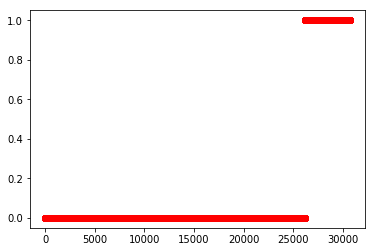

In [8]:
#ANALYSIS BY QUAND VAR
plt.plot(cdata['playoffs'],'ro')

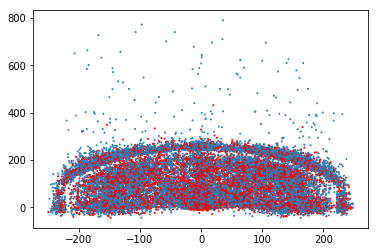

In [9]:
#SHOT LOCATION
c=np.where(cdata['shot_made_flag']==1,"red", "#2980b9")
plt.scatter(cdata['loc_x'],cdata['loc_y'],1,c)

In [85]:
#MODELLING
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,
from sklearn.linear_model import LogisticRegression

In [78]:
print(cdata.columns)
mdata.head(10)

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')


,combined_shot_type,loc_x,loc_y,minutes_remaining,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,shot_id,lon,lat
1,Jump Shot,-157,0,10,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2,-118.4268,34.0443
2,Jump Shot,-101,135,7,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,3,-118.3708,33.9093
3,Jump Shot,138,175,6,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,4,-118.1318,33.8693
4,Dunk,0,0,6,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,5,-118.2698,34.0443
5,Jump Shot,-145,-11,9,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,6,-118.4148,34.0553
6,Layup,0,0,8,52,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,7,-118.2698,34.0443
8,Jump Shot,-65,108,6,12,12,1.0,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,9,-118.3348,33.9363
9,Jump Shot,-33,125,3,36,12,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,10,-118.3028,33.9193
10,Jump Shot,-94,238,1,56,25,0.0,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,11,-118.3638,33.8063
11,Jump Shot,121,127,11,0,17,1.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,12,-118.1488,33.9173


In [77]:
#PREPROCESSING
var=['combined_shot_type','loc_x', 'loc_y', 'minutes_remaining', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range','shot_id','lon','lat']
mdata=cdata[var]
mdata.isnull().values.any() #CHECK IF THERE IS NAN VALUE IN DATAFRAME

False

In [15]:
#CATEGORICAL DATA LABEL
from sklearn.preprocessing import LabelEncoder
charvar=["combined_shot_type","shot_type","shot_zone_area","shot_zone_basic","shot_zone_range"]
lb_make=LabelEncoder()
def labelizer(mdata,charvar,lb_make) :
    res=mdata
    for name in charvar:
        res[name + str("_label")]=lb_make.fit_transform(mdata[name])
        res=res.drop(name,axis=1)
    return res

tdata=labelizer(mdata,charvar,lb_make)
tdata.head(3)

#mdata["combined_shot_type_label"] = lb_make.fit_transform(mdata["combined_shot_type"])
#mdata["shot_type_label"] = lb_make.fit_transform(mdata["shot_type"])
#mdata["shot_zone_area_label"] = lb_make.fit_transform(mdata["shot_zone_area"])
#mdata['shot_zone_basic_label'] = lb_make.fit_transform(mdata["shot_zone_basic"])
#mdata['shot_zone_range_label'] = lb_make.fit_transform(mdata["shot_zone_range"])

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,loc_x,loc_y,minutes_remaining,seconds_remaining,shot_distance,shot_made_flag,shot_id,combined_shot_type_label,shot_type_label,shot_zone_area_label,shot_zone_basic_label,shot_zone_range_label
1,-157,0,10,22,15,0.0,2,3,0,3,4,2
2,-101,135,7,45,16,1.0,3,3,0,2,4,0
3,138,175,6,52,22,0.0,4,3,0,4,4,0


In [16]:
train,test=train_test_split(tdata,test_size=0.3)

In [17]:
def xysplit(data,target_var):
    Y=pd.DataFrame(data[target_var])
    X=data.drop(target_var,axis=1)
    return X,Y

In [18]:
X_train,Y_train=xysplit(train,'shot_made_flag')
X_test,Y_test=xysplit(test,'shot_made_flag')

In [79]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
import sklearn.metrics as met
def perf(X,Y,model):
    print(met.accuracy_score(Y,model.predict(X)))
    print(met.confusion_matrix(Y,model.predict(X)))
    return

In [80]:
#TRAINING DATA
perf(X_train,Y_train,rf)

0.9770945682993273
[[9918   45]
 [ 367 7657]]


In [81]:
#TEST DATA
perf(X_test,Y_test,rf)

0.5728923476005188
[[3172 1097]
 [2196 1245]]


In [23]:
#GRID SEARCH
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [24]:
# comment SPLIT DATA TRAIN/DEV/TEST SET

#train,dev=train_test_split(tdata,test_size=0.3)
#dev,test=train_test_split(dev,test_size=0.4)
#print(len(train),len(dev),len(test))
#X_train,Y_train=xysplit(train,'shot_made_flag')
#X_dev,Y_dev=xysplit(dev,'shot_made_flag')
#X_test,Y_test=xysplit(dev,'shot_made_flag')

In [25]:
grid_search.fit(X_train,Y_train)
# 12min

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   1.5s
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   1.5s
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   1.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   2.9s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   2.9s
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   2.9s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   4.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: 

In [82]:
#TRAIN DATA SET
print(grid_search.best_params_)
rf_opt=grid_search.best_estimator_
perf(X_train,Y_train,rf_opt)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [210]:
#TEST DATA SET
perf(X_test,Y_test,rf_opt)

0.5948119325551232
[[3348  953]
 [2171 1238]]


In [83]:
#ACTUALLY NO NEED OF DEV SET
#X_TEST=pd.concat([X_dev,X_test])
#Y_TEST=pd.concat([Y_dev,Y_test])
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(X_train,Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [84]:
perf(X_test,Y_test,adb)

0.6090791180285343
[[3628  641]
 [2373 1068]]


In [217]:
adb_param_grid={
    'learning_rate':[0.5],
    'n_estimators': [50,100,150]
}

adb_grid=GridSearchCV(estimator = adb, param_grid = adb_param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [218]:
adb_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.4s finished
/home/sunghyuk/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.5], 'n_estimators': [100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [219]:
print(adb_grid.best_estimator_)
adb_opt=adb_grid.best_estimator_
perf(X_test,Y_test,adb_opt)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=100, random_state=None)
0.609727626459144
[[3667  634]
 [2375 1034]]


In [50]:
#NEURAL NET

from keras.models import Sequential
from keras.layers import Dense,Flatten
import tensorflow as tf

#PREPROCESSING
X_train_nn=np.asarray(X_train.drop('shot_id',axis=1))
X_test_nn=np.asarray(X_test.drop('shot_id',axis=1))
Y_train_nn=np.asarray(Y_train)
Y_test_nn=np.asarray(Y_test)
#X_train_nn=tf.keras.utils.normalize(np.asarray(X_train_nn))
#X_test_nn=tf.keras.utils.normalize(np.asarray(X_test_nn))

nn=Sequential()
nn.add(Dense(4,activation='relu'))
nn.add(Dense(3,activation='relu'))
nn.add(Dense(1,activation='sigmoid'))

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn.fit(X_train_nn,Y_train_nn,batch_size=2,epochs=10)

Epoch 1/10
17987/17987 [==============================] - 10s 532us/step - loss: 0.7039 - acc: 0.5889
Epoch 2/10
17987/17987 [==============================] - 9s 489us/step - loss: 0.6676 - acc: 0.6032
Epoch 3/10
17987/17987 [==============================] - 9s 488us/step - loss: 0.6624 - acc: 0.6050
Epoch 4/10
17987/17987 [==============================] - 9s 482us/step - loss: 0.6594 - acc: 0.6089
Epoch 5/10
17987/17987 [==============================] - 9s 483us/step - loss: 0.6582 - acc: 0.6059
Epoch 6/10
17987/17987 [==============================] - 9s 482us/step - loss: 0.6574 - acc: 0.6074
Epoch 7/10
17987/17987 [==============================] - 9s 482us/step - loss: 0.6577 - acc: 0.6079
Epoch 8/10
17987/17987 [==============================] - 9s 482us/step - loss: 0.6564 - acc: 0.6074
Epoch 9/10
17987/17987 [==============================] - 9s 487us/step - loss: 0.6567 - acc: 0.6077
Epoch 10/10
17987/17987 [==============================] - 9s 494us/step - loss: 0.6569 - 

In [51]:
Y_pred_nn=nn.predict_classes(X_test_nn)
met.confusion_matrix(Y_test_nn,Y_pred_nn)

array([[3753,  516],
       [2502,  939]])

In [88]:
#LOGISTIC REGRESSION

Log=LogisticRegression()
Log.fit(X_train,Y_train)
perf(X_test,Y_test,Log)

0.6023346303501945
[[3367  902]
 [2164 1277]]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# SVM

from sklearn import svm

SVM=svm.SVC()
SVM.fit(X_train,Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
